<a href="https://colab.research.google.com/github/ayaramis/DataScience/blob/main/Capstone_Project_5_Student_(Hand_Written_Digits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:green;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:10px 10px;"><b>Hand Written Digits Classification</b></p>

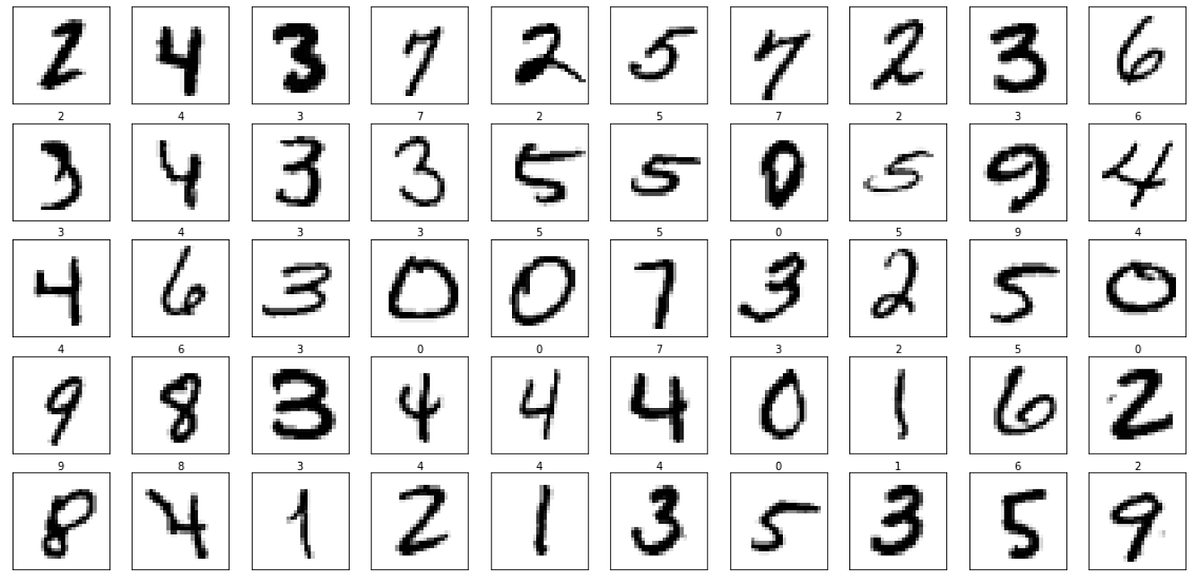

- The dataset consists of handwritten digits (0-9) collected from 44 writers.
- Each digit was written on a pressure-sensitive tablet, capturing 16 features like x and y coordinates of the pen traced across the screen.
- Originally, the data had a higher resolution, but it was normalized and downsampled to a fixed size (often 16x16 pixels).
Data Properties:

- Number of samples: 10992 (250 samples per writer x 44 writers)
- Number of features: 16 (e.g., coordinates, pressure)
- Number of classes: 10 (digits 0-9)
- Class distribution: Balanced (roughly equal number of samples for each digit)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


# Exploratory Data Analysis and Visualization

In [3]:
df = pd.read_csv('pendigits_txt.csv')

In [91]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [5]:
df.shape

(10992, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [8]:
df['class'].value_counts()

class
2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64

In [9]:
for i in df.columns:
  print('======'+i+'======')
  print(df.groupby('class')[i].sum())

======input1======
class
0    40431
1    16805
2    21041
3    26148
4    49144
5    43508
6    92422
7     3994
8    60081
9    73073
Name: input1, dtype: int64
======input2======
class
0     98371
1     70172
2     88030
3     88684
4    113874
5     95945
6    104248
7    103932
8     86595
9     85791
Name: input2, dtype: int64
======input3======
class
0    13233
1    50694
2    48197
3    59776
4    25312
5    44941
6    54652
7    51814
8    42021
9    55697
Name: input3, dtype: int64
======input4======
class
0     66649
1     89080
2    113699
3    104993
4     90809
5     80002
6     91581
7    112200
8     83994
9     87839
Name: input4, dtype: int64
======input5======
class
0    17071
1    79847
2    77175
3    91410
4     6581
5    60466
6    21869
7    90043
8    54664
9    47950
Name: input5, dtype: int64
======input6======
class
0     22403
1    102309
2     91247
3     89345
4     58525
5     62434
6     61758
7     92226
8     54784
9     85749
Name: input6, dtype: int6

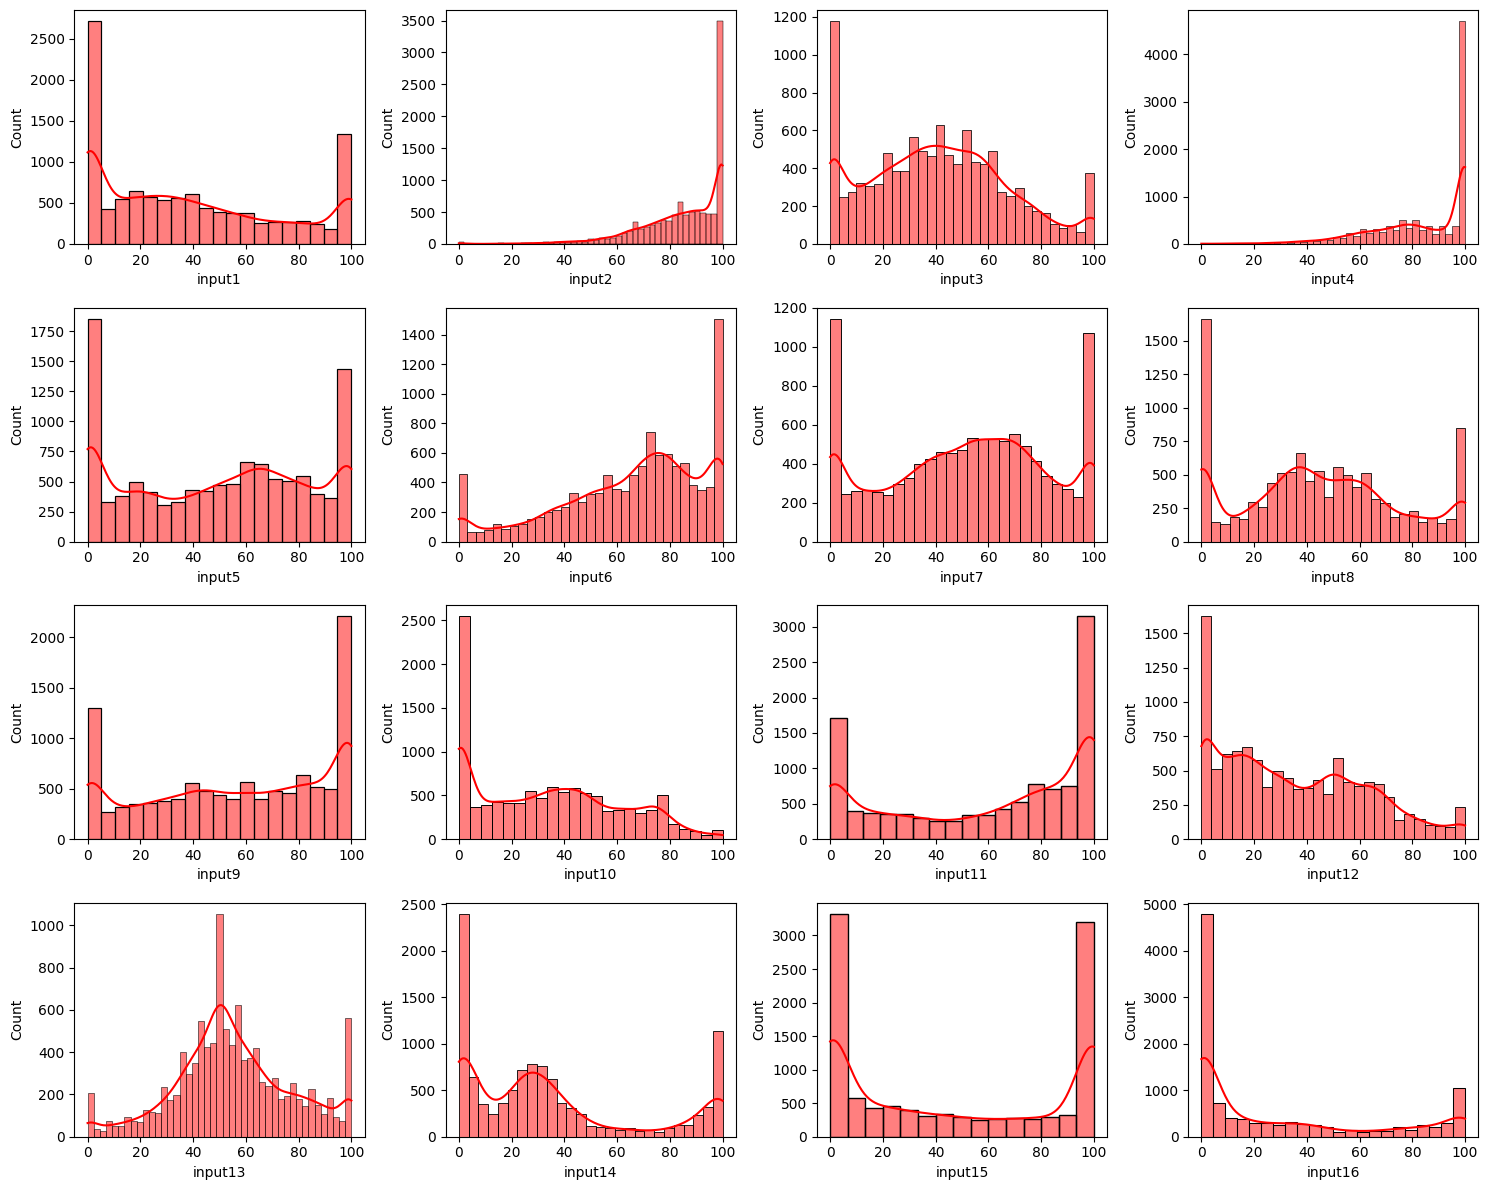

In [10]:
cols= list(df.columns)
fig, ax = plt.subplots(4,4,figsize=(15,12))
ind= 0
for i in range(4):
    for j in range(4):
        sns.histplot(df[cols[ind]], ax=ax[i,j], color = "red", kde=True)
        ind+=1
plt.tight_layout()
plt.show()

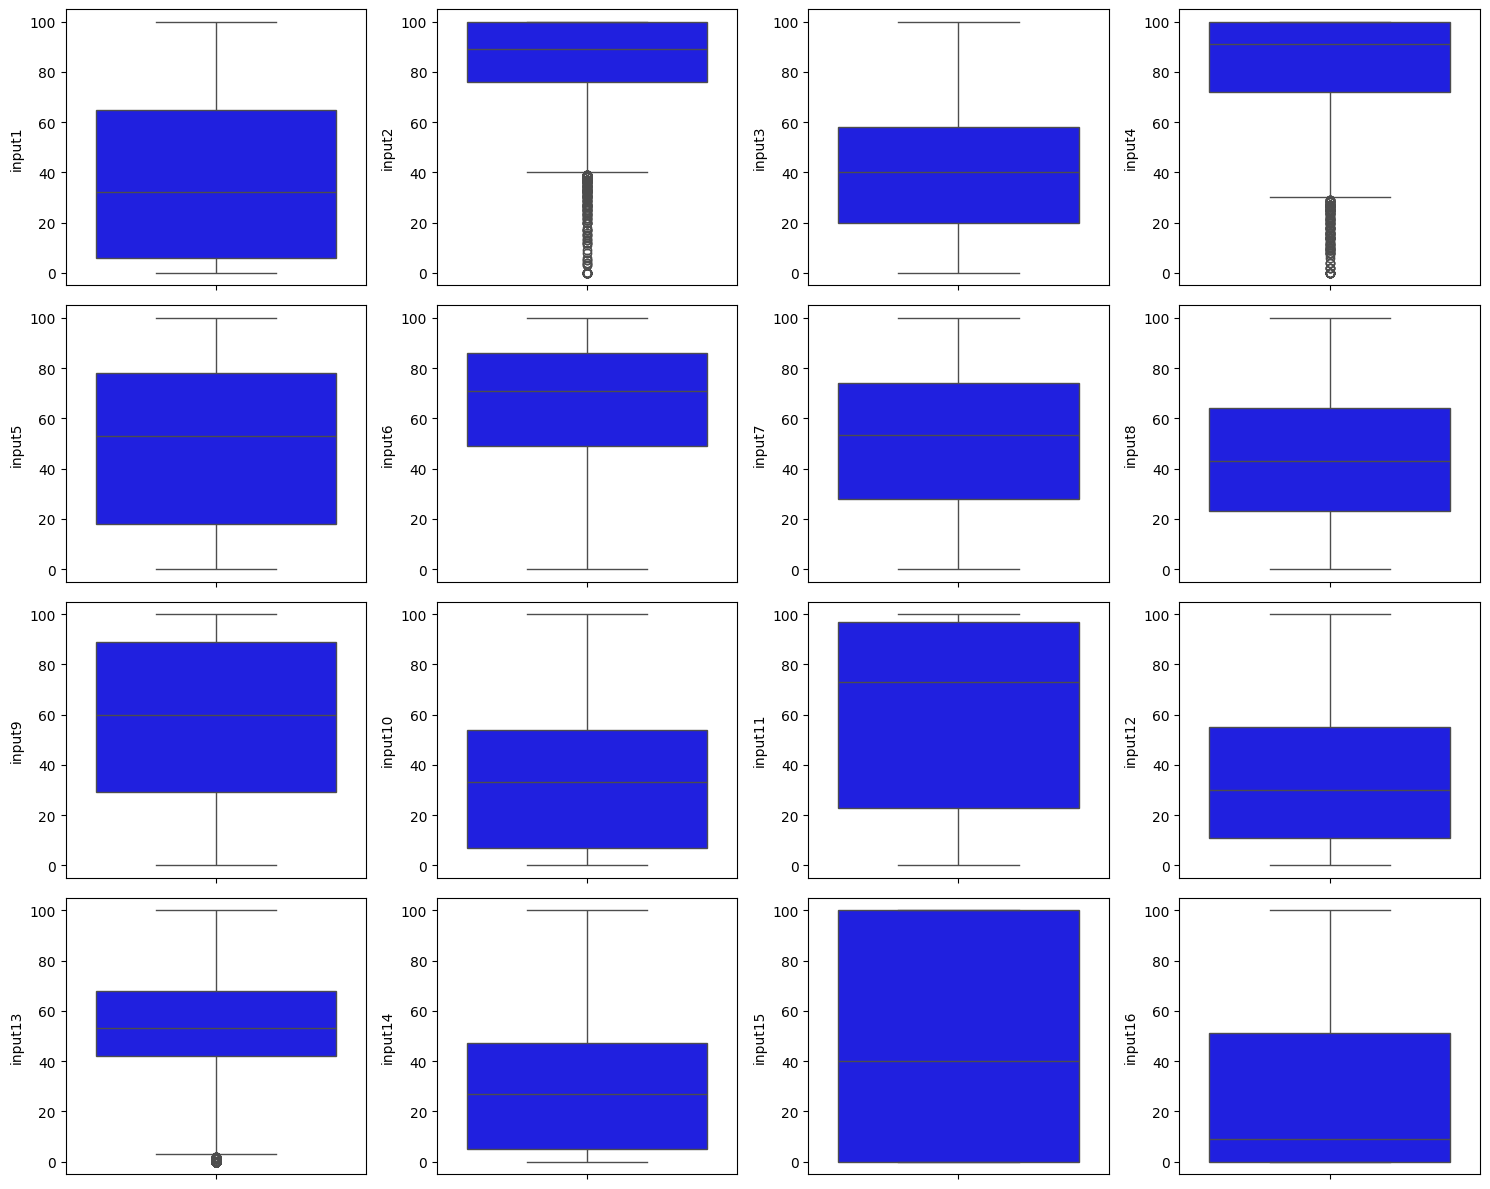

In [11]:
cols= list(df.columns)
fig, ax = plt.subplots(4,4,figsize=(15,12))
ind= 0
for i in range(4):
    for j in range(4):
        sns.boxplot(df[cols[ind]], ax=ax[i,j], color = "blue")
        ind+=1
plt.tight_layout()
plt.show()

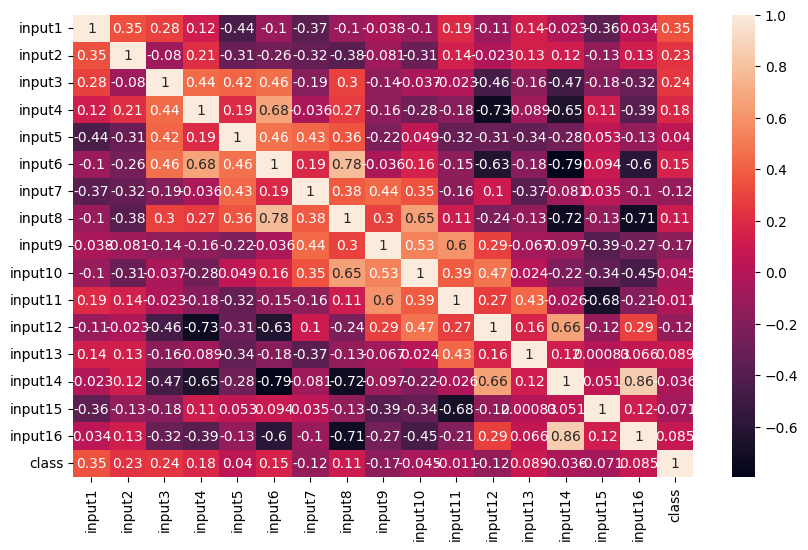

In [12]:
sns.heatmap(df.corr(), annot=True);

# Determination of Dependent and Independent Variable

In [13]:
X = df.drop(columns='class')
y = df['class']

In [14]:
print(X)
print(y)

       input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0          47     100      27      81      57      37      26       0       0   
1           0      89      27     100      42      75      29      45      15   
2           0      57      31      68      72      90     100     100      76   
3           0     100       7      92       5      68      19      45      86   
4           0      67      49      83     100     100      81      80      60   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
10987      36     100      24      70       0      38      49      33      95   
10988      16      75      41     100      52      64      32      27       0   
10989      56     100      27      79       0      39      12       0      66   
10990      19     100       0      61       3      23      48       0      97   
10991      38     100      37      81      12      55       0      28      52   

       input10  input11  in

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

In [92]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(10992, 16) (9892, 16) (1100, 16)
(10992,) (9892,) (1100,)


# Support Vector Machine (SVM) Classifier

In [28]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV

In [18]:
operations = [('Scaler', MinMaxScaler()), ('svc', SVC(random_state=1, kernel='linear'))]
svc_pipe = Pipeline(steps=operations)

In [19]:
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('svc', SVC(kernel='linear', random_state=1))])

In [20]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [21]:
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[107   0   0   0   1   0   2   0   4   0]
 [  0 112   2   0   0   0   0   0   0   0]
 [  0   1 113   0   0   0   0   0   0   0]
 [  0   0   0 105   0   0   0   1   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 102   0   0   2   1]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   1   0   1   0   0   0 112   0   0]
 [  3   0   0   0   0   1   0   0 102   0]
 [  1   2   0   0   0   1   0   0   0 102]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.97      0.98      0.97       114
           2       0.98      0.99      0.99       114
           3       0.98      0.99      0.99       106
           4       0.99      1.00      1.00       114
           5       0.98      0.96      0.97       106
           6       0.98      1.00      0.99       106
           7       0.99      0.98      0.99       114
           8       0.94      0.96      0.95       106
           9       

## Cross Validation for SVC

In [22]:
scores = cross_validate(svc_pipe,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.980287
train_accuracy           0.982107
test_recall_macro        0.980279
train_recall_macro       0.982111
test_precision_macro     0.980319
train_precision_macro    0.982006
test_f1_macro            0.980210
train_f1_macro           0.982046
dtype: float64

## GridSearchCV for SVC

In [35]:
svc = SVC(random_state=1)
param_grid = {"C": [0.001, 0.05, 0.01, 0.1, 1.0],
             "kernel": ["rbf", "linear"],
             "gamma": ["scale", "auto", 0.2, 0.3]}

svc_grid = GridSearchCV(estimator=svc, param_grid = param_grid, scoring = "f1_macro", return_train_score=True, n_jobs=-1)

In [ ]:
svc_grid.fit(X_train, y_train)

In [138]:
eval_metric(svc_grid, X_train, y_train, X_test, y_test)

Test_Set
[[113   0   0   0   0   0   1   0   0   0]
 [  0 111   2   0   0   0   0   0   0   1]
 [  0   1 113   0   0   0   0   0   0   0]
 [  0   0   1 105   0   0   0   0   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 105   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 114   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   1   0 105]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      0.97      0.98       114
           2       0.97      0.99      0.98       114
           3       0.99      0.99      0.99       106
           4       1.00      1.00      1.00       114
           5       1.00      0.99      1.00       106
           6       0.99      1.00      1.00       106
           7       0.99      1.00      1.00       114
           8       1.00      1.00      1.00       106
           9       

In [ ]:
svc_grid.best_params_

In [38]:
operations = [('Scaler', MinMaxScaler()), ('svc', SVC(random_state=1, C= 1.0, gamma = 'scale', kernel = 'rbf'))]
svc = Pipeline(steps=operations).fit(X_train, y_train)

In [39]:
eval_metric(svc, X_train, y_train, X_test, y_test)

Test_Set
[[113   0   0   0   0   0   1   0   0   0]
 [  0 111   2   0   0   0   0   0   0   1]
 [  0   1 113   0   0   0   0   0   0   0]
 [  0   0   1 105   0   0   0   0   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 105   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 114   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   1   0 105]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      0.97      0.98       114
           2       0.97      0.99      0.98       114
           3       0.99      0.99      0.99       106
           4       1.00      1.00      1.00       114
           5       1.00      0.99      1.00       106
           6       0.99      1.00      1.00       106
           7       0.99      1.00      1.00       114
           8       1.00      1.00      1.00       106
           9       

In [142]:
svc_grid.best_score_

0.9937573605699486

In [50]:
from sklearn.metrics import recall_score, f1_score, precision_recall_curve

In [58]:
y_pred = svc.predict(X_test)
svc_f1 = f1_score(y_test, y_pred, average='macro')
svc_recall = recall_score(y_test, y_pred, average='macro')

# Decision Tree (DT) Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [62]:
eval_metric(dt, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   3   0   0   0   0   0]
 [  0 106   3   1   1   0   0   3   0   0]
 [  0   2 111   0   0   0   0   0   0   1]
 [  0   1   1 101   0   1   0   1   0   1]
 [  0   0   2   0 111   0   0   0   0   1]
 [  0   1   0   1   0 103   0   0   0   1]
 [  2   0   0   0   0   1 102   0   0   1]
 [  0   0   1   1   0   0   0 109   1   2]
 [  0   0   0   0   0   1   1   3 101   0]
 [  0   0   0   2   2   2   0   1   0  99]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.96      0.93      0.95       114
           2       0.94      0.97      0.96       114
           3       0.95      0.95      0.95       106
           4       0.95      0.97      0.96       114
           5       0.95      0.97      0.96       106
           6       0.99      0.96      0.98       106
           7       0.93      0.96      0.94       114
           8       0.99      0.95      0.97       106
           9       

## Cross Validation for DT

In [63]:
dt = DecisionTreeClassifier(random_state=1)
scores = cross_validate(dt,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.963405
train_accuracy           1.000000
test_recall_macro        0.963401
train_recall_macro       1.000000
test_precision_macro     0.963919
train_precision_macro    1.000000
test_f1_macro            0.963452
train_f1_macro           1.000000
dtype: float64

## GridSearchCV for DT

In [147]:
dt = DecisionTreeClassifier(random_state=1)
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4,5,6, 7],
              "max_depth": [None, 2, 3, 4],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

dt_grid = GridSearchCV(estimator=dt, param_grid = param_grid, cv=10, scoring = "f1_macro", return_train_score=True, n_jobs=-1)

In [148]:
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_macro')

In [149]:
eval_metric(dt_grid, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   3   0   0   0   0   0]
 [  0 106   3   1   1   0   0   3   0   0]
 [  0   2 111   0   0   0   0   0   0   1]
 [  0   1   1 101   0   1   0   1   0   1]
 [  0   0   2   0 111   0   0   0   0   1]
 [  0   1   0   1   0 103   0   0   0   1]
 [  2   0   0   0   0   1 102   0   0   1]
 [  0   0   1   1   0   0   0 109   1   2]
 [  0   0   0   0   0   1   1   3 101   0]
 [  0   0   0   2   2   2   0   1   0  99]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.96      0.93      0.95       114
           2       0.94      0.97      0.96       114
           3       0.95      0.95      0.95       106
           4       0.95      0.97      0.96       114
           5       0.95      0.97      0.96       106
           6       0.99      0.96      0.98       106
           7       0.93      0.96      0.94       114
           8       0.99      0.95      0.97       106
           9       

In [150]:
dt_grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [151]:
dt_grid.best_score_

0.9634521673814083

In [64]:
dt = DecisionTreeClassifier(max_depth = None,
                            max_features = None,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            splitter = 'best',
                            random_state=1).fit(X_train, y_train)

In [65]:
eval_metric(dt, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   3   0   0   0   0   0]
 [  0 106   3   1   1   0   0   3   0   0]
 [  0   2 111   0   0   0   0   0   0   1]
 [  0   1   1 101   0   1   0   1   0   1]
 [  0   0   2   0 111   0   0   0   0   1]
 [  0   1   0   1   0 103   0   0   0   1]
 [  2   0   0   0   0   1 102   0   0   1]
 [  0   0   1   1   0   0   0 109   1   2]
 [  0   0   0   0   0   1   1   3 101   0]
 [  0   0   0   2   2   2   0   1   0  99]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.96      0.93      0.95       114
           2       0.94      0.97      0.96       114
           3       0.95      0.95      0.95       106
           4       0.95      0.97      0.96       114
           5       0.95      0.97      0.96       106
           6       0.99      0.96      0.98       106
           7       0.93      0.96      0.94       114
           8       0.99      0.95      0.97       106
           9       

In [66]:
y_pred = dt.predict(X_test)
dt_f1 = f1_score(y_test, y_pred, average='macro')
dt_recall = recall_score(y_test, y_pred, average='macro')

# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)

In [69]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[112   0   0   0   2   0   0   0   0   0]
 [  0 111   3   0   0   0   0   0   0   0]
 [  0   0 114   0   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   2   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 105   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 113   0   1]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   1   0   0   0   0   0   0   0 105]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.99      0.97      0.98       114
           2       0.97      1.00      0.99       114
           3       0.99      0.98      0.99       106
           4       0.98      1.00      0.99       114
           5       1.00      0.99      1.00       106
           6       1.00      1.00      1.00       106
           7       0.98      0.99      0.99       114
           8       1.00      1.00      1.00       106
           9       

## Cross Validation for RF

In [70]:
rf = RandomForestClassifier(random_state=1)
scores = cross_validate(rf,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.992418
train_accuracy           1.000000
test_recall_macro        0.992527
train_recall_macro       1.000000
test_precision_macro     0.992615
train_precision_macro    1.000000
test_f1_macro            0.992524
train_f1_macro           1.000000
dtype: float64

## GridSearchCV for RF

In [218]:
rf = RandomForestClassifier(random_state=1)
param_grid = param_grid = {'n_estimators':[200, 400, 800],
             'max_features':[1, 2],
             'max_depth':[4, 6],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [1, 2],
             'max_samples':[0.8, 1]}

rf_grid = GridSearchCV(estimator=rf, param_grid = param_grid, cv=10, scoring = "f1_macro", return_train_score=True, n_jobs=-1)

first parameters<br>
param_grid = {'n_estimators':[64, 128, 200],<br>
             'max_features':[2, 4, 'sqrt'],<br>
             'max_depth':[2, 3, 4],<br>
             'min_samples_split':[2, 3,4],<br>
             'min_samples_leaf': [2,3,4],<br>
             'max_samples':[0.8, 1]}

In [219]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'max_features': [1, 2],
                         'max_samples': [0.8, 1], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 400, 800]},
             return_train_score=True, scoring='f1_macro')

In [220]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features=2, max_samples=0.8,
                       min_samples_split=4, n_estimators=800, random_state=1)

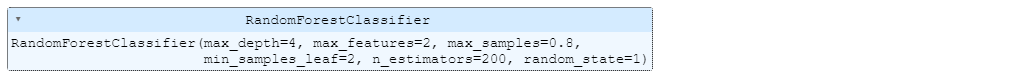

In [221]:
rf_grid.best_params_

{'max_depth': 6,
 'max_features': 2,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 800}

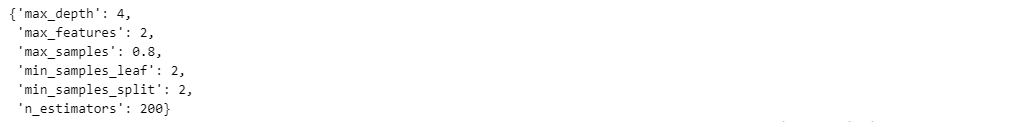

In [71]:
rf = RandomForestClassifier(max_depth=6, max_features=2, max_samples=0.8,
                       min_samples_split=4, n_estimators=800, random_state=1).fit(X_train, y_train)

In [72]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   2   0   0   0   0   1]
 [  0  91  19   3   0   0   0   0   0   1]
 [  0   3 110   1   0   0   0   0   0   0]
 [  0   1   0 103   0   0   0   1   0   1]
 [  0   0   0   0 113   0   1   0   0   0]
 [  0   0   0   3   0  97   0   0   0   6]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   4   0   0   0   0   0 107   1   2]
 [  1   0   0   0   0   0   0   3 101   1]
 [  0   1   0   0   0   0   0   0   0 105]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       114
           1       0.91      0.80      0.85       114
           2       0.85      0.96      0.91       114
           3       0.94      0.97      0.95       106
           4       0.98      0.99      0.99       114
           5       1.00      0.92      0.96       106
           6       0.99      1.00      1.00       106
           7       0.96      0.94      0.95       114
           8       0.99      0.95      0.97       106
           9       

In [73]:
y_pred = rf.predict(X_test)
rf_f1 = f1_score(y_test, y_pred, average='macro')
rf_recall = recall_score(y_test, y_pred, average='macro')

# Choose the Best Model

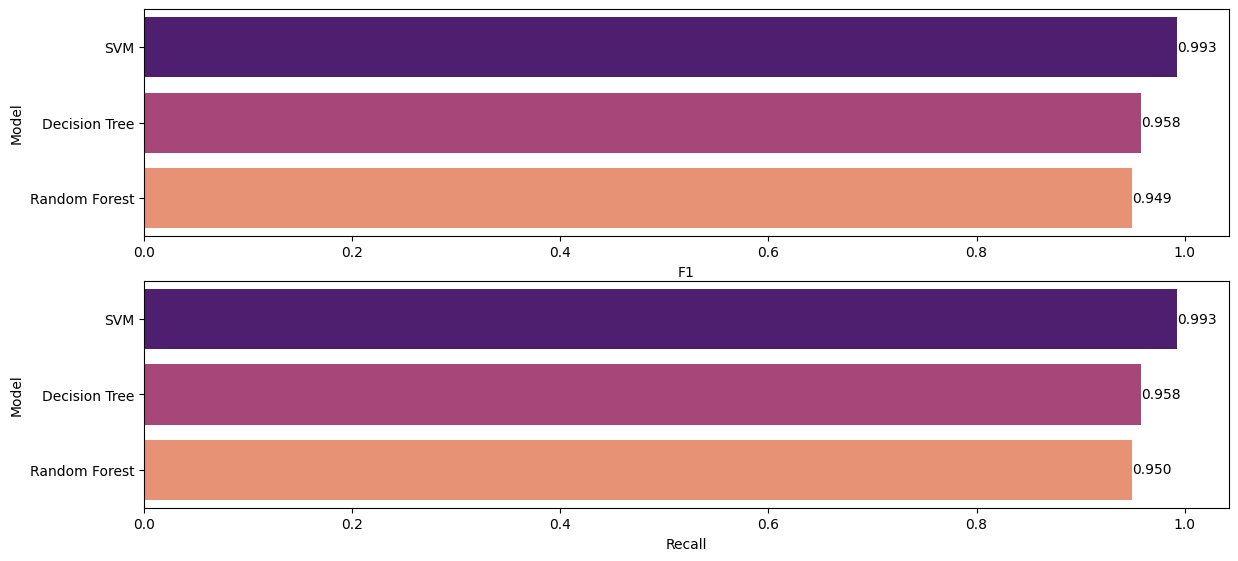

In [75]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest"],
                        "F1": [svc_f1, dt_f1, rf_f1],
                        "Recall": [svc_recall, dt_recall, rf_recall],})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

In [76]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [00:46<00:01,  1.05s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 9892, number of used features: 16
[LightGBM] [Info] Start training from score -2.263139
[LightGBM] [Info] Start training from score -2.263139
[LightGBM] [Info] Start training from score -2.262168
[LightGBM] [Info] Start training from score -2.344073
[LightGBM] [Info] Start training from score -2.262168
[LightGBM] [Info] Start training from score -2.344073
[LightGBM] [Info] Start training from score -2.343020
[LightGBM] [Info] Start training from score -2.264111
[LightGBM] [Info] Start training from score -2.344073
[LightGBM] [Info] Start training from score -2.344073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

100%|██████████| 29/29 [00:49<00:00,  1.69s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LabelPropagation                   0.99               0.99    None      0.99   
LabelSpreading                     0.99               0.99    None      0.99   
SVC                                0.99               0.99    None      0.99   
KNeighborsClassifier               0.99               0.99    None      0.99   
XGBClassifier                      0.99               0.99    None      0.99   
ExtraTreesClassifier               0.99               0.99    None      0.99   
LGBMClassifier                     0.99               0.99    None      0.99   
RandomForestClassifier             0.99               0.99    None      0.99   
BaggingClassifier                  0.98               0.98    None      0.98   
QuadraticDiscriminantAnalysis      0.96               0.96    None      0.96   
DecisionTreeClassifier             0.95 

**For the hand written digit data, we have multiclass classification problem. To achieve the best scores, I choose three models. With these models initially I performed without any parameter adjustment. After obtaining the initial score, I checked with Cross Validation, then tuned with GridSearchCV and obtained the best parameters. These parameters are used for the final score comparison. Since have multiclass balanced target data, I choose f1 Macro as an evaluation metric. By comparing Support Vector Machine Classifier, Decision Tree Classifier and Random Forest Classifier, the best model in terms of score and efficiency, SVC outperforms the rest. Therefore, as a final model I will continue with SVC model.**

In [77]:
operations = [('Scaler', MinMaxScaler()), ('svc', SVC(random_state=1, C= 1.0, gamma = 'scale', kernel = 'rbf'))]
svc = Pipeline(steps=operations).fit(X, y)

In [89]:
df.loc[800]

input1      91
input2      98
input3      48
input4     100
input5      12
input6      60
input7       0
input8      15
input9      55
input10      0
input11    100
input12     27
input13     39
input14     38
input15      5
input16      5
class        6
Name: 800, dtype: int64

In [88]:
obs = X_train[22:23]
obs

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
800,91,98,48,100,12,60,0,15,55,0,100,27,39,38,5,5


In [90]:
prediction = svc.predict(obs)
prediction

array([6], dtype=int64)